# ✏️K-Means 


In this project, we implement K-Means with Python. We use this algorithm to analyse and evaluate the correlations between  energy efficiency, energy productivity, energy consumption and economic growth.

**Data and Variables.**

In order to conduct this research, we have used data provided by Eurostat, which is the statistical office that collects data for the European Union. The analyzed data includes all EU-27 member states:Belgium, Bulgaria,  Czech Republic,   Denmark, Germany,   Estonia,  Ireland,   Greece,  Spain,   France,Croatia, Italy, Cyprus, Latvia, Lithuania, Luxembourg, Hungary, Malta, Netherlands, Austria, Poland,Portugal, Romania, Slovenia, Slovakia, Finland and Sweden. We must mention that our project employs a  more varied approach, taking into account different type of countries (developed   and   underdeveloped), the observed period being from 2011 to 2021. This aspect leads to a large variety of values for the considered variables. The macroeconomic indicators analyzed in this project are:
- PEC (Primary energy consumption)
- FEC (Final energy consumption)
- Gross domestic product per capita (GDP per capita)
- IR (Inflation rate)
- EM (Employment)
- EE (Energy efficiency)
- EP (Energy productivity)

We will perform a clustering analysis on the countries considered, taking into account different macroeconomic parameters.

**✏️Importing the required libraries for K-Means.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

**✏️Loading the data into the dataframe.**

The values of the macroeconomic indicators for each country were obtained as the arithmetic mean of the values of these variables in the interval 2011-2021

In [2]:
data={
       'EM':[4541.825, 2979.191666666667, 4948.683333333333, 2522.8166666666666, 38357.48333333333, 596.4416666666667, 1984.7583333333332, 3725.025, 18242.433333333334, 25798.100000000002, 1575.5999999999997, 22075.908333333336, 376.3, 849.5166666666665, 1278.4583333333333, 255.18333333333337, 4127.0, 201.7166666666667, 7803.333333333331, 3962.108333333332, 15670.25, 4410.5583333333325, 8132.916666666667, 917.9833333333332, 2412.8833333333337, 2353.2166666666667, 4570.216666666666],
       'EE':[47.82749999999999, 17.823333333333334, 40.03333333333333, 17.347499999999997, 292.8258333333333, 5.2875000000000005, 14.005833333333333, 23.441666666666666, 118.48333333333335, 239.3275, 8.170833333333334, 149.77916666666664, 2.42, 4.4174999999999995, 6.0925, 4.31, 23.819166666666664, 0.8383333333333333, 64.62583333333333, 31.7825, 96.48500000000001, 21.45, 31.895, 6.6066666666666665, 15.726666666666665, 32.431666666666665, 45.78583333333335],
       'GDP':[119.75, 49.583333333333336, 88.75, 129.5, 123.5, 78.0, 167.5, 69.83333333333333, 90.33333333333333, 106.58333333333333, 63.166666666666664, 99.16666666666667, 90.08333333333333, 64.83333333333333, 76.66666666666667, 271.3333333333333, 69.91666666666667, 95.08333333333333, 131.83333333333334, 128.66666666666666, 69.41666666666667, 77.66666666666667, 61.5, 85.5, 74.25, 113.41666666666667, 125.08333333333333],
       'PEC':[47.84166666666666, 17.833333333333332, 40.03333333333334, 17.341666666666665, 292.825, 5.3, 14.016666666666667, 23.433333333333334, 118.47499999999998, 239.34166666666667, 8.191666666666666, 149.79166666666669, 2.4250000000000003, 4.441666666666667, 6.099999999999999, 4.308333333333334, 23.825, 0.8416666666666667, 64.63333333333334, 31.8, 96.50833333333334, 21.458333333333332, 31.916666666666668, 6.608333333333334, 15.741666666666667, 32.44166666666667, 45.800000000000004],
       'EP':[6.2266666666666675, 2.2708333333333335, 4.088333333333334, 14.436666666666667, 8.854166666666666, 3.22, 16.23, 7.155833333333333, 8.254166666666666, 8.251666666666667, 5.435833333333332, 9.85, 7.306666666666666, 4.524166666666667, 4.558333333333333, 11.060833333333333, 4.3983333333333325, 3.5608333333333335, 7.521666666666666, 9.315833333333332, 4.236666666666666, 7.458333333333333, 4.641666666666667, 5.680833333333333, 4.644166666666666, 5.6875, 8.19],
       'FEC':[35.833333333333336, 9.483333333333334, 24.816666666666666, 14.29166666666667, 214.27499999999998, 2.858333333333333, 11.483333333333334, 16.466666666666665, 82.975, 147.39166666666668, 6.758333333333334, 116.7, 1.7749999999999997, 3.975, 5.141666666666667, 4.1499999999999995, 17.68333333333333, 0.5833333333333334, 49.94166666666666, 27.608333333333338, 67.91666666666667, 16.391666666666666, 22.941666666666666, 4.841666666666667, 10.741666666666667, 24.991666666666664, 32.025],
       'IR':[1.7636363636363634, 1.1363636363636365, 2.0, 0.990909090909091, 1.5272727272727273, 2.4727272727272727, 0.6818181818181818, 0.21818181818181814, 1.1818181818181819, 1.2454545454545454, 1.2363636363636366, 1.1363636363636365, 0.6545454545454545, 1.7272727272727273, 2.0727272727272723, 1.6636363636363634, 2.645454545454545, 1.4181818181818182, 1.6363636363636365, 1.9636363636363634, 1.9454545454545453, 1.0545454545454547, 2.527272727272727, 1.190909090909091, 1.8090909090909093, 1.4272727272727272, 1.2454545454545454],
       'COUNTRY':['BE','BG','CZ','DK','DE','EE','IE','EL','ES','FR','HR','IT','CY','LV','LT','LU','HU','MT','NL','AT','PL','PT','RO','SI','SK','FI','SE']
}

df=pd.DataFrame(data,columns=['EM','EE','GDP','PEC','EP','IR','FEC','COUNTRY'])

In [3]:
df

,EM,EE,GDP,PEC,EP,IR,FEC,COUNTRY
0,4541.825000,47.827500,119.750000,47.841667,6.226667,1.763636,35.833333,BE
1,2979.191667,17.823333,49.583333,17.833333,2.270833,1.136364,9.483333,BG
2,4948.683333,40.033333,88.750000,40.033333,4.088333,2.000000,24.816667,CZ
3,2522.816667,17.347500,129.500000,17.341667,14.436667,0.990909,14.291667,DK
4,38357.483333,292.825833,123.500000,292.825000,8.854167,1.527273,214.275000,DE
5,596.441667,5.287500,78.000000,5.300000,3.220000,2.472727,2.858333,EE
6,1984.758333,14.005833,167.500000,14.016667,16.230000,0.681818,11.483333,IE
7,3725.025000,23.441667,69.833333,23.433333,7.155833,0.218182,16.466667,EL
8,18242.433333,118.483333,90.333333,118.475000,8.254167,1.181818,82.975000,ES
9,25798.100000,239.327500,106.583333,239.341667,8.251667,1.245455,147.391667,FR


- **Dataset Information.**

In [4]:
print('The dataset contains {} row and {} columns.'.format(df.shape[0],df.shape[1]))
print('The size of dataset (rows x columns): ',df.size)

The dataset contains 27 row and 8 columns.
The size of dataset (rows x columns):  216


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EM       27 non-null     float64
 1   EE       27 non-null     float64
 2   GDP      27 non-null     float64
 3   PEC      27 non-null     float64
 4   EP       27 non-null     float64
 5   IR       27 non-null     float64
 6   FEC      27 non-null     float64
 7   COUNTRY  27 non-null     object 
dtypes: float64(7), object(1)
memory usage: 1.8+ KB


In [6]:
df.isnull().sum()

EM         0
EE         0
GDP        0
PEC        0
EP         0
IR         0
FEC        0
COUNTRY    0
dtype: int64

- **A summary of the statistics relating to the numerical variables.**

In [7]:
round(df.describe(),2)

,EM,EE,GDP,PEC,EP,IR,FEC
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,6839.63,50.48,100.77,50.49,6.93,1.50,36.08
std,9272.33,72.35,44.07,72.35,3.28,0.58,50.57
min,201.72,0.84,49.58,0.84,2.27,0.22,0.58
25%,1427.03,7.39,72.08,7.40,4.54,1.16,5.95
50%,3725.02,23.44,90.08,23.43,6.23,1.43,16.47
75%,6376.01,46.81,121.62,46.82,8.25,1.88,33.93
max,38357.48,292.83,271.33,292.82,16.23,2.65,214.27


- **Scale the data.**

We bring all the features to the same scale for applying distance based algorithm K-Means.

In [8]:
def scaling(x,y):
    x=df[x].tolist()
    y=df[y].tolist()
    x_scaled = preprocessing.scale(x)
    y_scaled = preprocessing.scale(y)
    return  list(zip(x_scaled,y_scaled)),x_scaled,y_scaled

**✏️Fit the K-Means model.**

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data. The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
- he centroids of the K clusters, which can be used to label new data
- labels for the training data (each data point is assigned to a single cluster).

 - **Choosing the right K.**

The K-Means algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia or the within-cluster sum of squares criterion. This can be recognized as a measure of how internally coherent clusters are. We use the Elbow Method to choose the best K value.

In [9]:
def elbow(x,y):
    data,x,y= scaling(x,y)
    inertias = []
    for i in range(1,28):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1,28), inertias, marker='o')
    plt.title('Elbow method',color="blue")
    plt.xlabel('Number of clusters',color="red")
    plt.ylabel('Inertia',color="red")
    plt.grid()
    plt.show()

- **Visualisation.**

In [10]:
def graph(x,y,n_centroids):
    kmeans = KMeans(n_clusters=n_centroids)
    data,x_scaled,y_scaled = scaling(x,y)
    kmeans.fit(data)
    centroid=kmeans.cluster_centers_
    plt.scatter(x_scaled, y_scaled, c=kmeans.labels_)
    plt.plot(centroid[0,0],centroid[0,1],"ro",label="centroid")
    for i in range(1,n_centroids):
        plt.plot(centroid[i,0],centroid[i,1],"ro")
        plt.xlabel("%s"%(x),color="red")
        plt.ylabel("%s"%(y),color="red")
        plt.title("Clauster analysis",color="blue")
    plt.legend()    
    for i, txt in enumerate(df['COUNTRY']):
        plt.annotate(txt, (x_scaled[i],y_scaled[i])) 
    labels = kmeans.labels_
    plt.show()


**✏️Silhouette Score.**

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [11]:
def silhouette(x,y):
    range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]
    silhouette_avg = []
    data,x_scaled,y_scaled = scaling(x,y)
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(data)
        cluster_labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(data, cluster_labels))
    plt.plot(range_n_clusters,silhouette_avg,'bx-')
    plt.xlabel('Values of K',color="red") 
    plt.ylabel('Silhouette score',color="red") 
    plt.ylabel('Silhouette score',color="red") 
    plt.title('Silhouette Analysis ',color="blue")
    plt.grid()
    plt.show()

**✏️Implementation.**

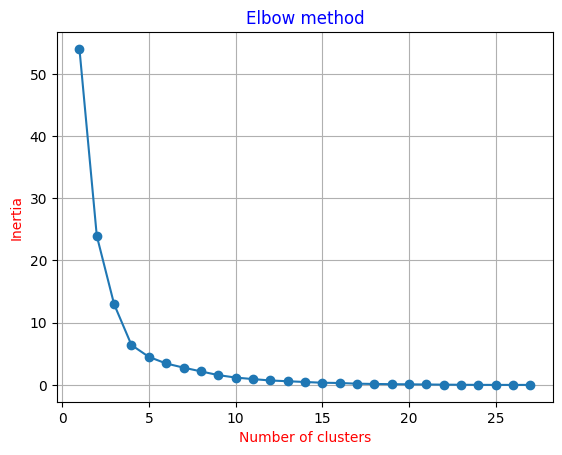

In [12]:
elbow('EP','GDP')

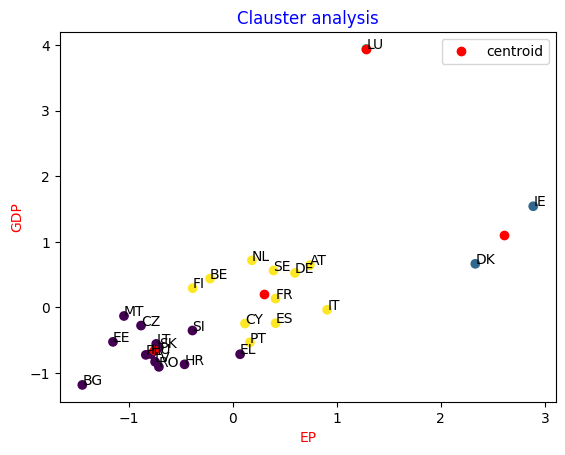

In [13]:
graph('EP','GDP',4)

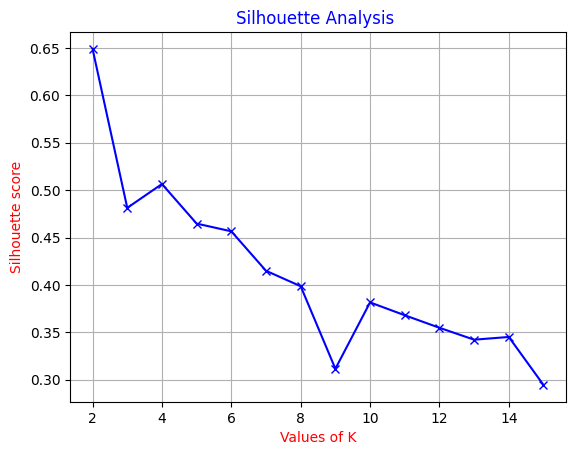

In [14]:
silhouette('EP','GDP')

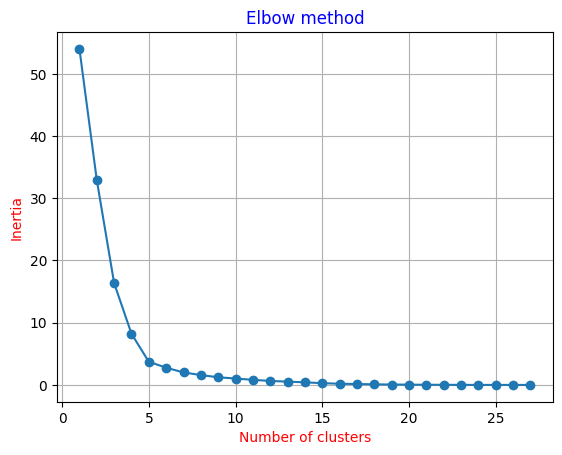

In [15]:
elbow('EE','GDP')

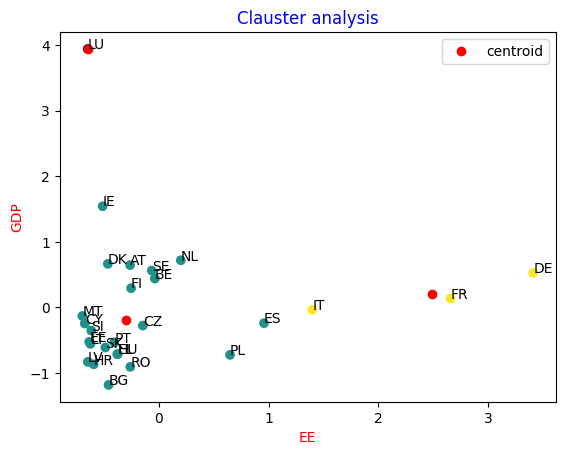

In [18]:
graph('EE','GDP',3)

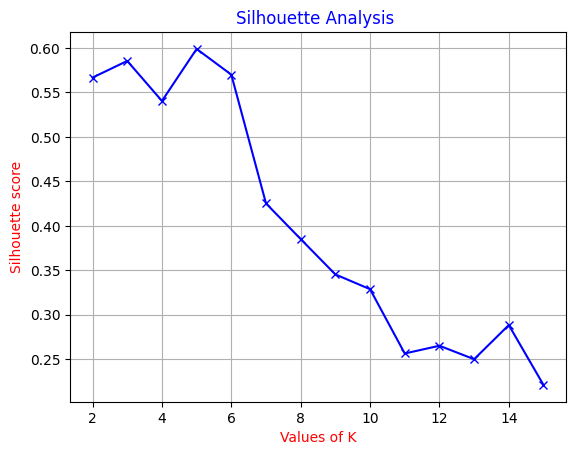

In [19]:
silhouette('EE','GDP')

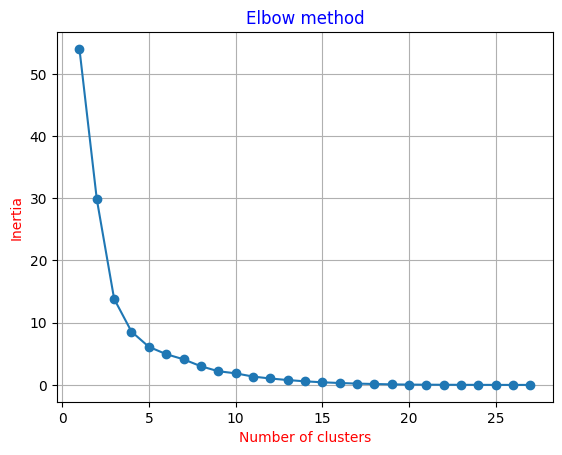

In [20]:
elbow('FEC','EP')

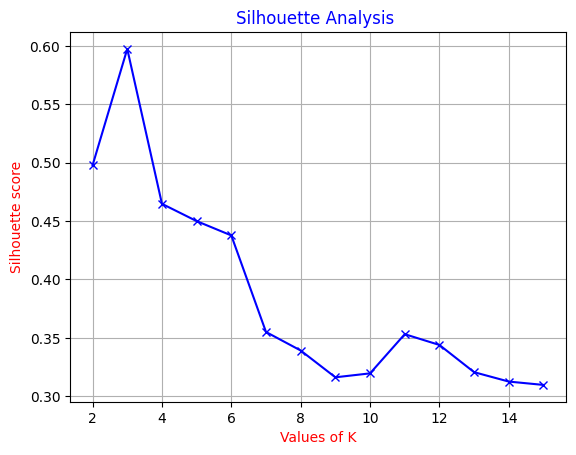

In [21]:
silhouette('FEC','EP')

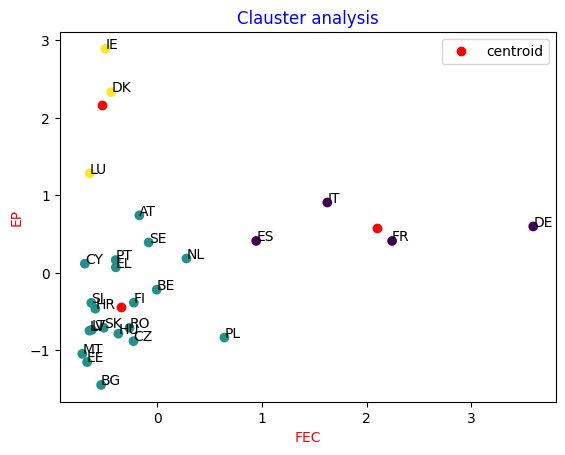

In [22]:
graph('FEC','EP',3)